<a href="https://colab.research.google.com/github/PRAVITH10/K_Means/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [56]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [57]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [58]:
df.shape

(200, 5)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [60]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [61]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [62]:
df.drop('CustomerID',axis=1,inplace=True)

<Axes: >

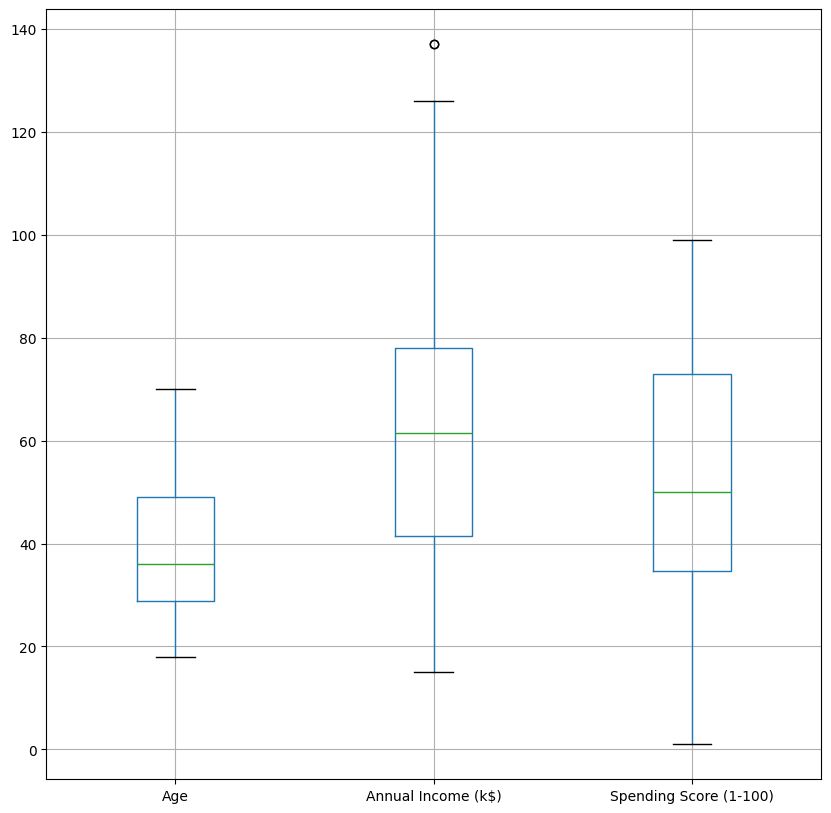

In [63]:
df_num=df.select_dtypes(include='int64')
plt.figure(figsize=(10,10))
df_num.boxplot()

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

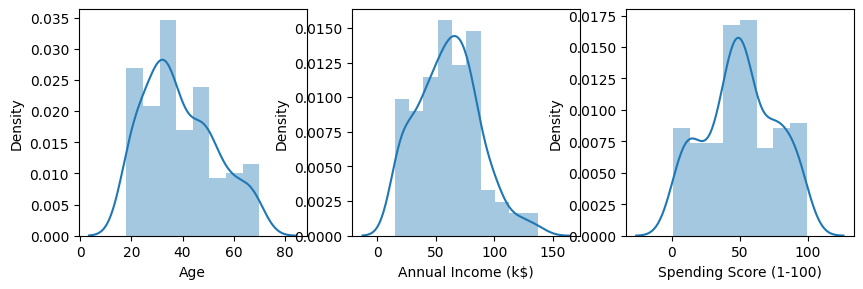

In [64]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.distplot(df['Age'])
plt.subplot(3,3,2)
sns.distplot(df['Annual Income (k$)'])
plt.subplot(3,3,3)
sns.distplot(df['Spending Score (1-100)'])

<Axes: >

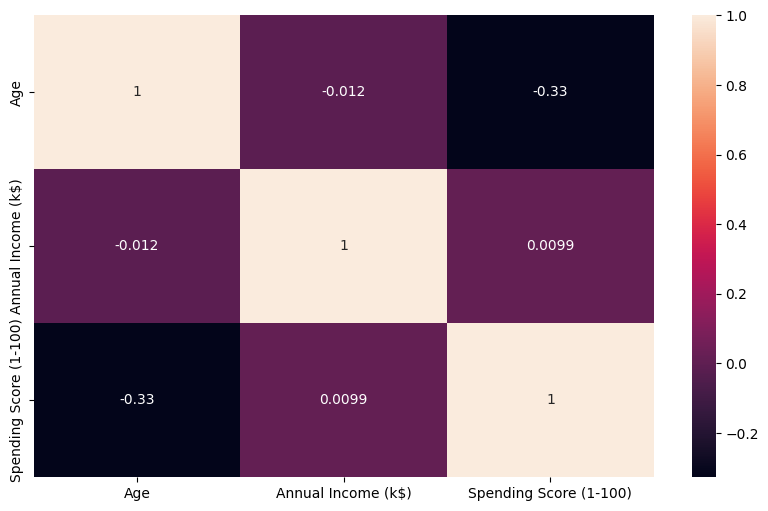

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(df_num.corr(),annot=True)

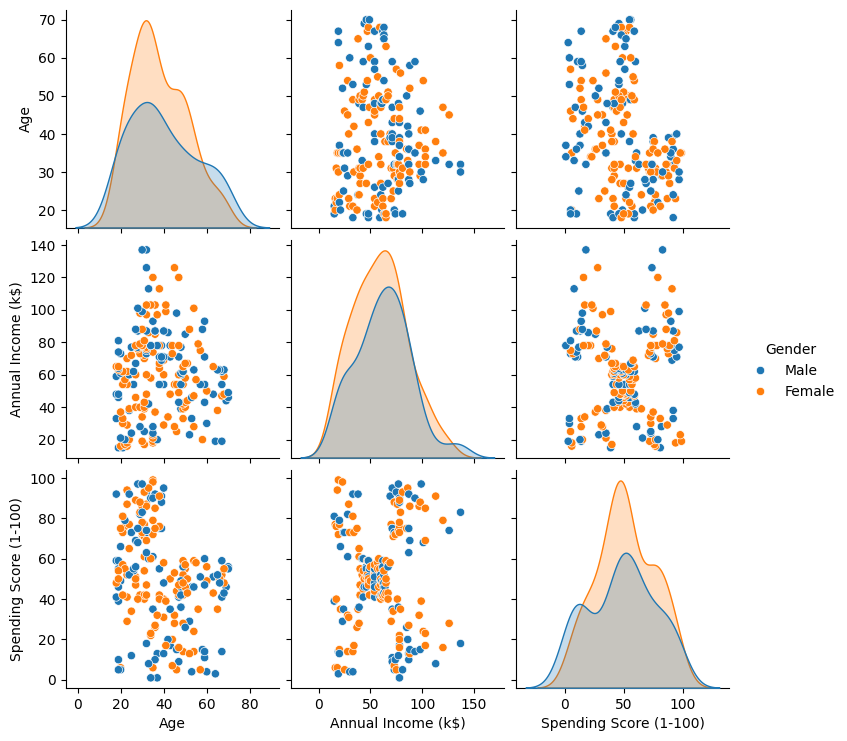

In [66]:
sns.pairplot(df,vars=['Age','Annual Income (k$)','Spending Score (1-100)'],hue='Gender')

In [67]:
from sklearn.cluster import KMeans

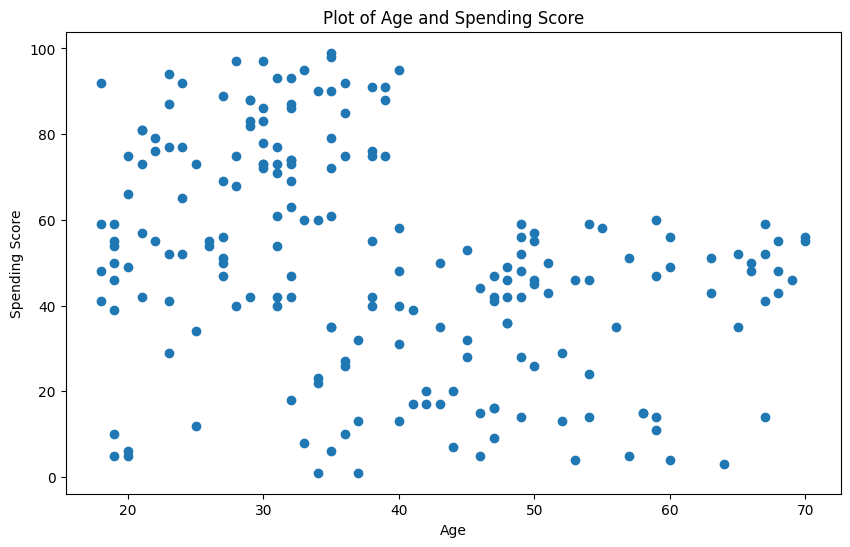

In [68]:
plt.figure(1,figsize=(10,6))
plt.title('Plot of Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter(df['Age'],df['Spending Score (1-100)'])
plt.show()

In [69]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
sc=StandardScaler()
df_sc=sc.fit_transform(df_num)
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [72]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [74]:
km=KMeans(n_clusters=4)
km.fit(df_sc)

KMeans(n_clusters=4)

In [75]:
km.labels_

array([0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 3, 3, 1, 3, 1, 3, 2, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [76]:
km.inertia_

205.22514747675913

In [77]:
km1=KMeans(n_clusters=5)
km1.fit(df_sc)

KMeans(n_clusters=5)

In [78]:
km1.inertia_

169.89149793438568

In [91]:
inertia = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, random_state=42, n_init=10)
  km.fit(df_sc)
  inertia.append(km.inertia_)
  print(f"Clusters: {i}, Inertia: {km.inertia_}")

Clusters: 1, Inertia: 599.9999999999999
Clusters: 2, Inertia: 389.38618895643714
Clusters: 3, Inertia: 295.21224615554877
Clusters: 4, Inertia: 205.22514747675913
Clusters: 5, Inertia: 168.2475801755683
Clusters: 6, Inertia: 133.86842085478855
Clusters: 7, Inertia: 117.01155455889815
Clusters: 8, Inertia: 103.87329152383714
Clusters: 9, Inertia: 93.0928911004172
Clusters: 10, Inertia: 82.38515364526597


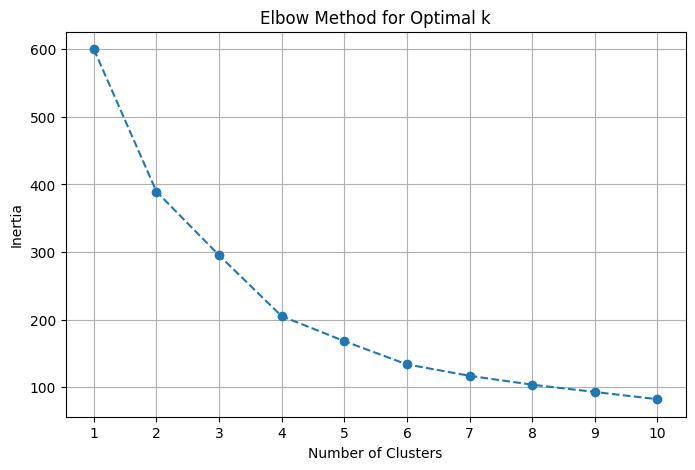

In [92]:
# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [94]:
l=km1.labels_
df['Cluster']=l
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,3
3,0,23,16,77,1
4,0,31,17,40,1


In [95]:
from sklearn.metrics import silhouette_score,silhouette_samples

In [97]:
silhouette_score(df_sc,l).min()

np.float64(0.40846873777345605)

In [102]:
sil_width=silhouette_samples(df_sc,l)
df['Silhouette Width']=sil_width
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Silhouette Width
0,1,19,15,39,1,0.079266
1,1,21,15,81,1,0.624547
2,0,20,16,6,3,0.180735
3,0,23,16,77,1,0.638790
4,0,31,17,40,1,0.044395


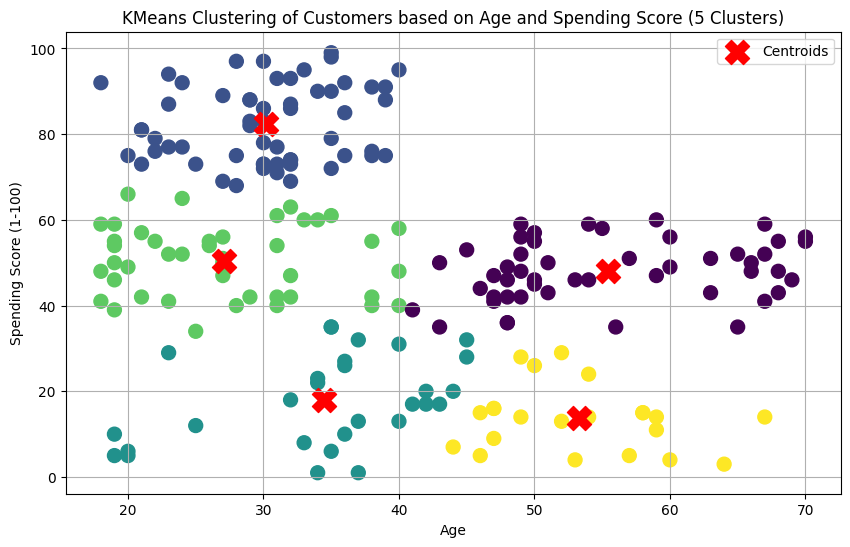

In [119]:
# Select the features for clustering
X1 = df[['Age', 'Spending Score (1-100)']]

# Apply KMeans clustering with 5 clusters
kmeans_age_spending = KMeans(n_clusters=5)
kmeans_age_spending.fit(X1)

# Get the cluster labels and centroids
labels1 = kmeans_age_spending.labels_
centroids1 = kmeans_age_spending.cluster_centers_

# Visualize the clusters and centroids
plt.figure(figsize=(10, 6))
plt.scatter(x=X1['Age'], y=X1['Spending Score (1-100)'], c=labels1, s=100, cmap='viridis')
plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering of Customers based on Age and Spending Score (5 Clusters)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()